# Does the flavor affect the overall ratings of workout supplements?

## 1. Loading the Dataset

In [27]:
nutrition <- read.csv("bodybuilding_nutrition_products.csv")
head(nutrition)
names(nutrition)

,average_flavor_rating,brand_name,link,number_of_flavors,number_of_reviews,overall_rating,price,price_per_serving,product_category,product_description,product_name,top_flavor_rated,verified_buyer_number,verified_buyer_rating
,<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,9.1,EVLUTION NUTRITION,https://sa.bodybuilding.com/store/evlution-nutrition/bcaa-energy.html?skuId=EVL4230288,29,2575,9.4,19.99,0.67,BCAAs,BCAA Powder with Natural Energizers Sourced from Green Coffee and Green Tea To Support Focus and Recovery*,BCAA Energy,Pink Starblast,1594,9
2,8.4,Optimum Nutrition,https://sa.bodybuilding.com/store/opt/whey.html?skuId=OPT302,43,9926,9.3,57.99,0.79,Build Muscle Products,24g of Whey Protein with Amino Acids for Muscle Recovery and Growth*,Gold Standard 100% Whey,Unflavored,3932,9
3,8.3,JYM Supplement Science,https://sa.bodybuilding.com/store/jym/pre-jym.html?skuId=JYM4910066,9,3947,9.1,48.99,1.63,Improve Workout Products,Pre-Workout Powder Powerhouse Packed with 13-Hand Picked Ingredients to Support Improved Workouts*,Pre JYM,Raspberry Lemonade,3471,9
4,NA,Optimum Nutrition,https://sa.bodybuilding.com/store/opt/essential-amino-energy.html?skuId=OPT1900064,NA,2466,9.1,18.99,0.63,Amino Acids,Amino Acid Powder with Caffeine from Natural Sources!,Essential AmiN.O. Energy,,,NA
5,8.7,JYM Supplement Science,https://sa.bodybuilding.com/store/jym/pro-jym.html?skuId=JYM5570006,14,2506,9.2,56.98,1.10,Whey Protein Isolate,"24g of Pure, Quality Protein in Every Scoop with No Added Amino Acids or Filler Nutrients",Pro JYM,S'mores,2275,9
6,NA,MuscleTech,https://sa.bodybuilding.com/store/muscletech/essential-series-platinum-100-creatine.html?skuId=MT2320202,NA,895,9.5,7.55,0.09,Creatine Monohydrate,5g of Micronized Creatine to Support Lean Muscle and Increase Strength*,Platinum 100% Creatine,,,NA


[1] "average_flavor_rating" "brand_name"            "link"                 
 [4] "number_of_flavors"     "number_of_reviews"     "overall_rating"       
 [7] "price"                 "price_per_serving"     "product_category"     
[10] "product_description"   "product_name"          "top_flavor_rated"     
[13] "verified_buyer_number" "verified_buyer_rating"

## 2.Processing Data
- Subsetting two columns `average_flavor_rating` and `overall_rating`
- Fitering out rows that contain NAs

In [28]:
# Subsetting two columns I need for flavor/overall rating analysis
flavor <- nutrition[c("average_flavor_rating", "overall_rating")]
head(flavor)

,average_flavor_rating,overall_rating
,<dbl>,<dbl>
1,9.1,9.4
2,8.4,9.3
3,8.3,9.1
4,NA,9.1
5,8.7,9.2
6,NA,9.5


In [29]:
flavor<- na.omit(flavor) # removing NA's
head(flavor)

,average_flavor_rating,overall_rating
,<dbl>,<dbl>
1,9.1,9.4
2,8.4,9.3
3,8.3,9.1
5,8.7,9.2
8,9.1,9.3
9,9.3,9.1


## 3. Exploring data
- Obtain summary statistics
- Visualize the distribution of each variable, using histograms and boxplots -- `average_flavor_rating` and `overall_rating`
- Explore the relationship between two variables using a scatter plot

In [30]:
# Getting summary statistics for each variable
summary(flavor)

 average_flavor_rating overall_rating  
 Min.   : 1.000        Min.   : 1.000  
 1st Qu.: 8.300        1st Qu.: 8.700  
 Median : 8.800        Median : 9.100  
 Mean   : 8.666        Mean   : 8.976  
 3rd Qu.: 9.200        3rd Qu.: 9.400  
 Max.   :10.000        Max.   :10.000  

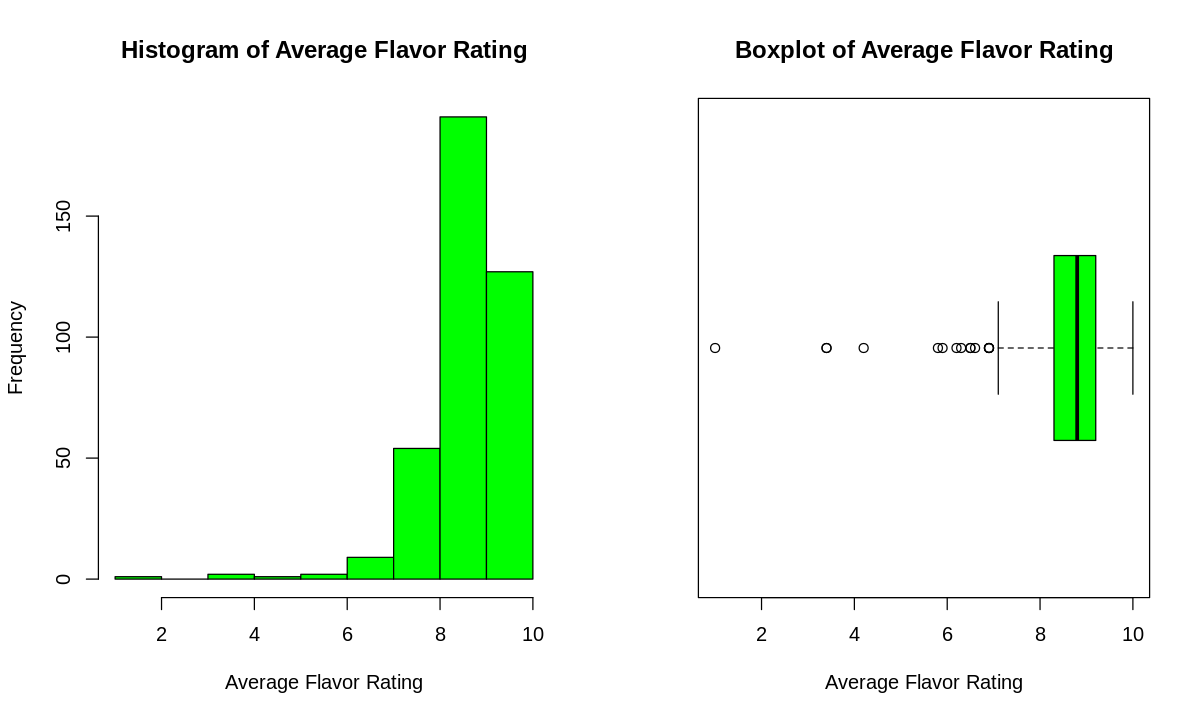

In [31]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(1,2))
hist(flavor$average_flavor_rating, 
     main = "Histogram of Average Flavor Rating", 
     xlab = "Average Flavor Rating",
     col = "green")
boxplot(flavor$average_flavor_rating, 
     main = "Boxplot of Average Flavor Rating", 
     xlab = "Average Flavor Rating",
     col = "green",
     horizontal = TRUE)

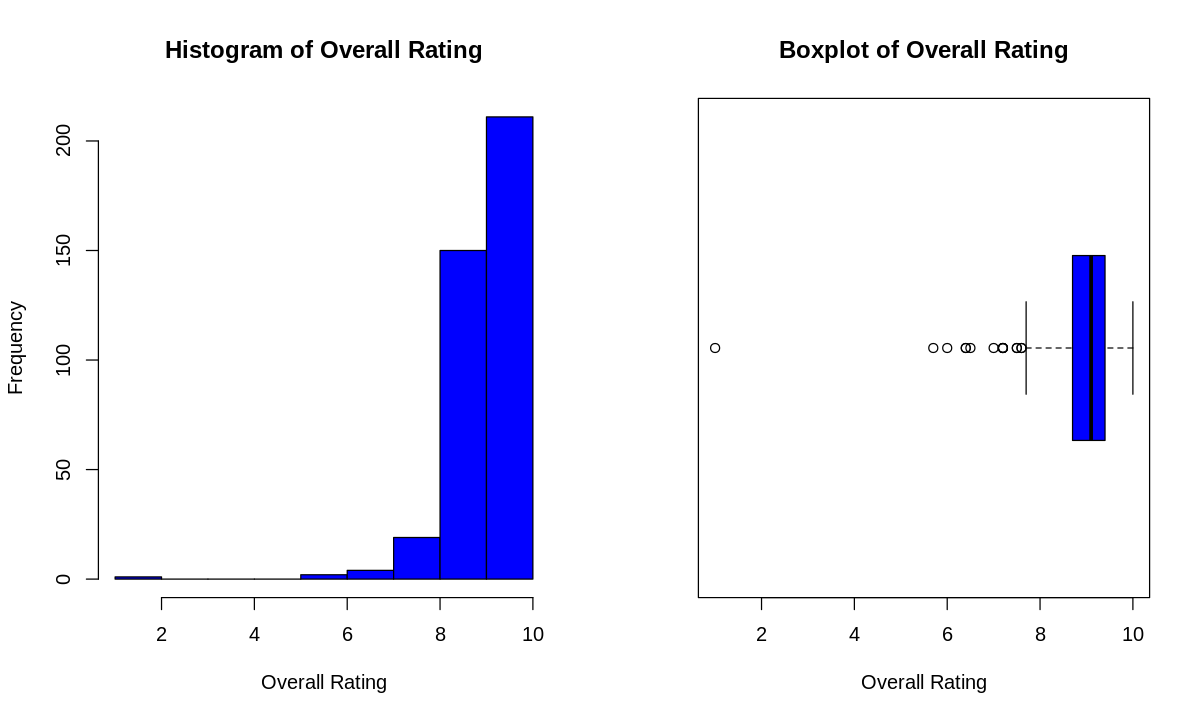

In [32]:
options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(1,2))
hist(flavor$overall_rating,
     main = "Histogram of Overall Rating",
     xlab = "Overall Rating",
     col = "blue")
boxplot(flavor$overall_rating,
     main = "Boxplot of Overall Rating",
     xlab = "Overall Rating",
     col = "blue",
     horizontal = TRUE)

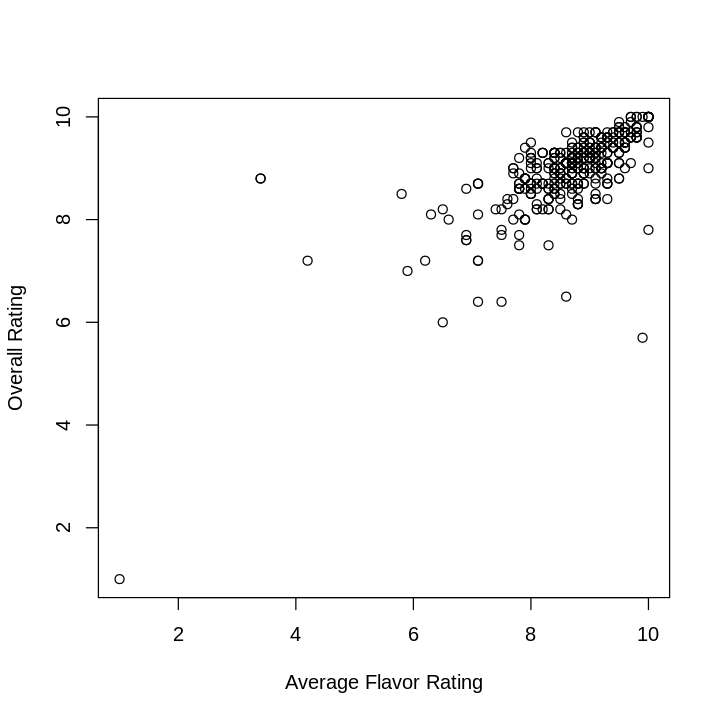

In [33]:
# Creating a scatter plot with the two variables
options(repr.plot.width = 6, repr.plot.height = 6)
plot(flavor$average_flavor_rating, flavor$overall_rating, 
     xlab = "Average Flavor Rating", 
     ylab = "Overall Rating")

## 4.Defining the Relationship Between Two Variables
- Trend line on the scatter plot
- Exploring the error terms
- Goodness of Fit

In [34]:
Reg <- lm(overall_rating ~ average_flavor_rating, data = nutrition)
Reg


Call:
lm(formula = overall_rating ~ average_flavor_rating, data = nutrition)

Coefficients:
          (Intercept)  average_flavor_rating  
               4.2192                 0.5489  



Call:
lm(formula = overall_rating ~ average_flavor_rating, data = nutrition)

Coefficients:
          (Intercept)  average_flavor_rating  
               4.2192                 0.5489  


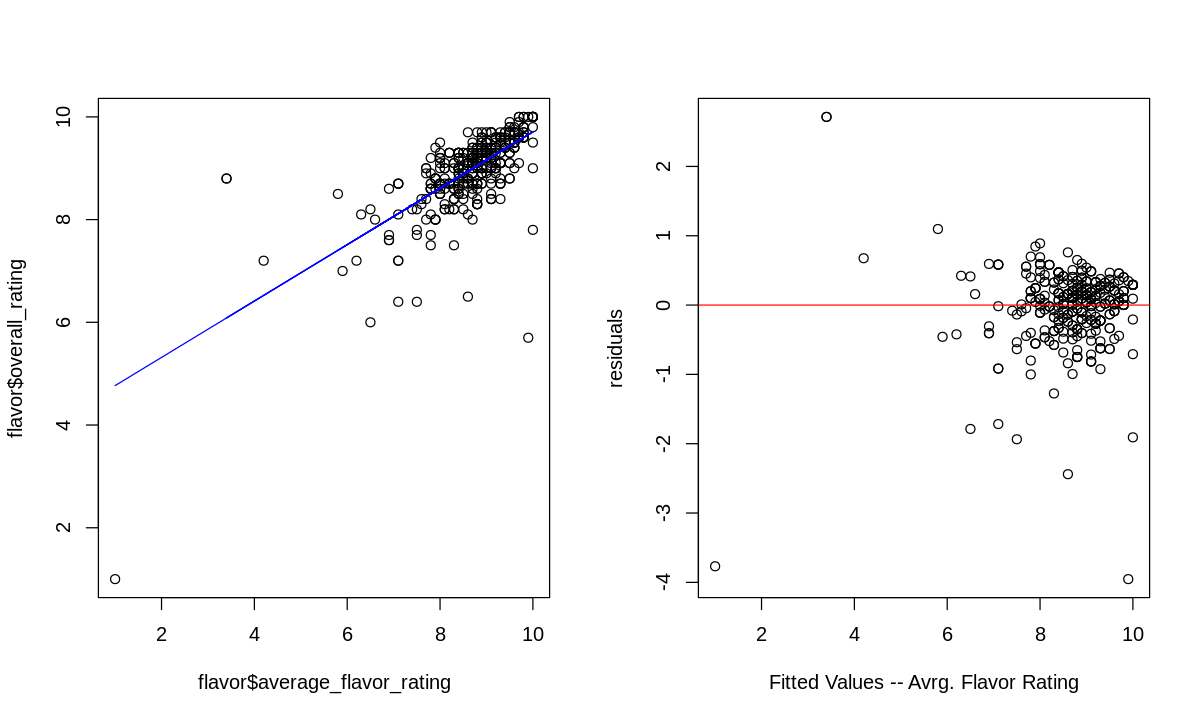

In [35]:

lm(overall_rating ~ average_flavor_rating, data = nutrition)
BLUE <- 4.2192 + (0.5489 * nutrition$average_flavor_rating)

options(repr.plot.width = 10, repr.plot.height = 6)
par(mfrow = c(1,2))
plot(flavor$average_flavor_rating, flavor$overall_rating)
lines(BLUE ~ nutrition$average_flavor_rating, col = "blue")
# abline(lm(flavor$overall_rating ~ flavor$average_flavor_rating))



x <- flavor$average_flavor_rating
y <- flavor$overall_rating

residuals <- y - 4.2192 - 0.5489 * x
plot(x, residuals, xlab = "Fitted Values -- Avrg. Flavor Rating")
abline(lm(residuals ~ x), col = "red")





In [36]:
library(jtools)
summ(Reg)

MODEL INFO:
Observations: 387 (453 missing obs. deleted)
Dependent Variable: overall_rating
Type: OLS linear regression 

MODEL FIT:
F(1,385) = 352.92, p = 0.00
R² = 0.48
Adj. R² = 0.48 

Standard errors: OLS
---------------------------------------------------------
                              Est.   S.E.   t val.      p
--------------------------- ------ ------ -------- ------
(Intercept)                   4.22   0.25    16.57   0.00
average_flavor_rating         0.55   0.03    18.79   0.00
---------------------------------------------------------

$R^2 = 0.48$, which means 48% of data's variance can be explained by the linear model above

In [37]:
cor(na.omit(flavor))

,average_flavor_rating,overall_rating
average_flavor_rating,1.000000,0.691564
overall_rating,0.691564,1.000000


# 5. Conclusion

As shown above, the **correlation coefficient between `average_flavor_rating` and `overall_rating` is 0.69** and the regression line also shows relatively strong positive correlation. In other words, there seems to be a **consistent tendency** that an increase in `average_flavor_rating` will likely lead to an increase in `overall_rating`